In [71]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [81]:
war = pd.read_csv('war.csv', on_bad_lines='skip',delimiter='|')
thief = pd.read_csv('thief.csv', on_bad_lines='skip',delimiter='|')
dorian = pd.read_csv('dorian.csv', on_bad_lines='skip',delimiter='|')
achilles = pd.read_csv('achilles.csv', on_bad_lines='skip',delimiter='|')
batman = pd.read_csv('batman.csv', on_bad_lines='skip',delimiter='|')


In [82]:
war["renderedContent"] = war["renderedContent"].str.replace(r'@\S*', '', regex=True).str.replace(r'http*', '', regex=True)
war["renderedContent"] = war["renderedContent"].apply(lambda x: re.sub(r'[^\w\s]', '', x))
# enlever les espaces 
war["renderedContent"] = war["renderedContent"].str.strip()
# Conversion des phrases en majuscule
war["renderedContent"] = war["renderedContent"].str.capitalize()

In [83]:
thief["renderedContent"] = thief["renderedContent"].str.replace(r'@\S*', '', regex=True).str.replace(r'http*', '', regex=True)
thief["renderedContent"] = thief["renderedContent"].apply(lambda x: re.sub(r'[^\w\s]', '', x))
# enlever les espaces 
thief["renderedContent"] = thief["renderedContent"].str.strip()
# Conversion des phrases en majuscule
thief["renderedContent"] = thief["renderedContent"].str.capitalize()

In [84]:
dorian["renderedContent"] = dorian["renderedContent"].str.replace(r'@\S*', '', regex=True).str.replace(r'http*', '', regex=True)
dorian["renderedContent"] = dorian["renderedContent"].apply(lambda x: re.sub(r'[^\w\s]', '', x))
# enlever les espaces 
dorian["renderedContent"] = dorian["renderedContent"].str.strip()
# Conversion des phrases en majuscule
dorian["renderedContent"] = dorian["renderedContent"].str.capitalize()

In [85]:
achilles["renderedContent"] = achilles["renderedContent"].str.replace(r'@\S*', '', regex=True).str.replace(r'http*', '', regex=True)
achilles["renderedContent"] = achilles["renderedContent"].apply(lambda x: re.sub(r'[^\w\s]', '', x))
# enlever les espaces 
achilles["renderedContent"] = achilles["renderedContent"].str.strip()
# Conversion des phrases en majuscule
achilles["renderedContent"] = achilles["renderedContent"].str.capitalize()

In [86]:
batman["renderedContent"] = batman["renderedContent"].str.replace(r'@\S*', '', regex=True).str.replace(r'http*', '', regex=True)
batman["renderedContent"] = batman["renderedContent"].apply(lambda x: re.sub(r'[^\w\s]', '', x))
# enlever les espaces 
batman["renderedContent"] = batman["renderedContent"].str.strip()
# Conversion des phrases en majuscule
batman["renderedContent"] = batman["renderedContent"].str.capitalize()

In [87]:
war_df = pd.DataFrame(data=war)
thief_df = pd.DataFrame(data=thief)
dorian_df = pd.DataFrame(data=dorian)
achilles_df = pd.DataFrame(data=achilles)
batman_df = pd.DataFrame(data=batman)



In [72]:
def iow(dataframe, wordlist):

    stopwords = set(wordlist)

    comment_words = ''
    # iterate through the csv file
    for val in dataframe.renderedContent.values:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "
 
    wordcloud01 = WordCloud(width = 800, height = 800,
                    background_color ='black',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)
# plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud01)
    plt.axis("off")
    plt.tight_layout(pad = 0)

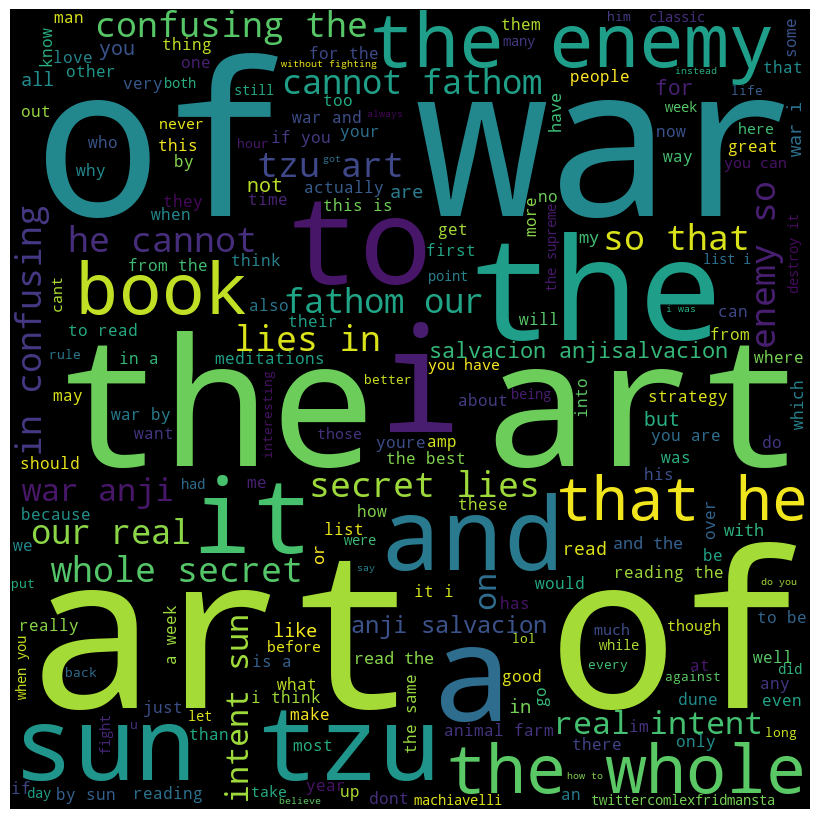

In [88]:
iow(war_df, ['test'])

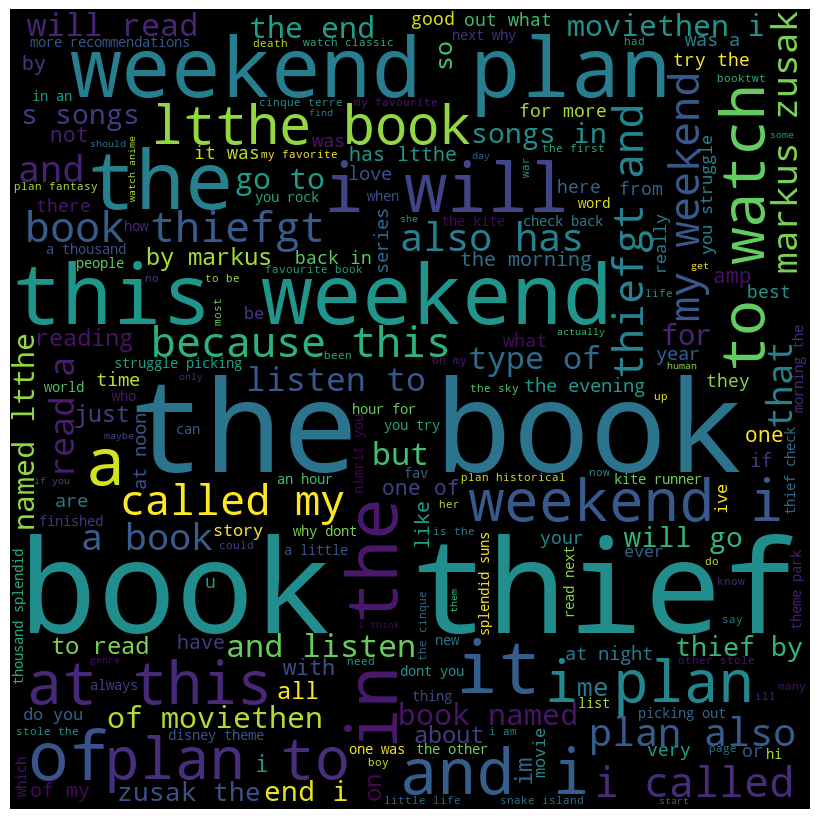

In [89]:
iow(thief_df, ['test'])

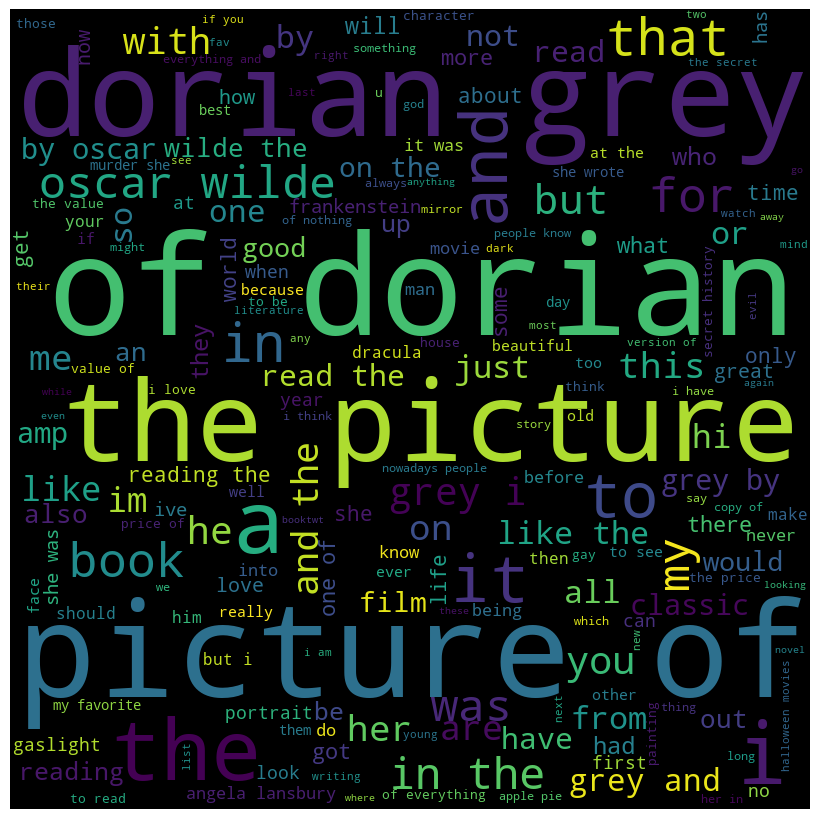

In [90]:
iow(dorian_df, ['test'])

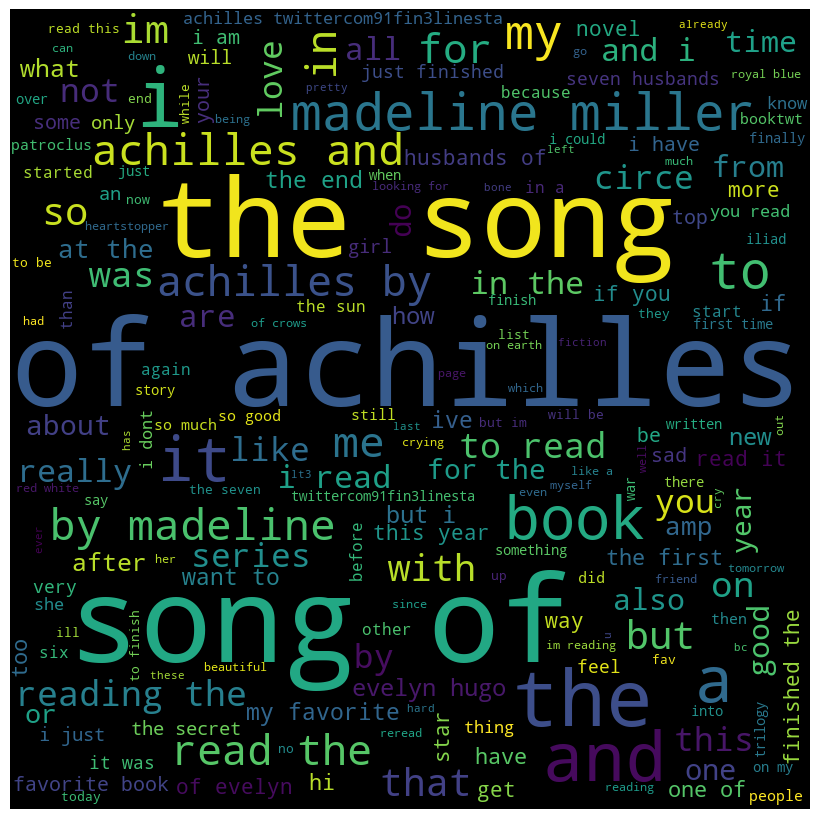

In [91]:
iow(achilles_df, ['test'])

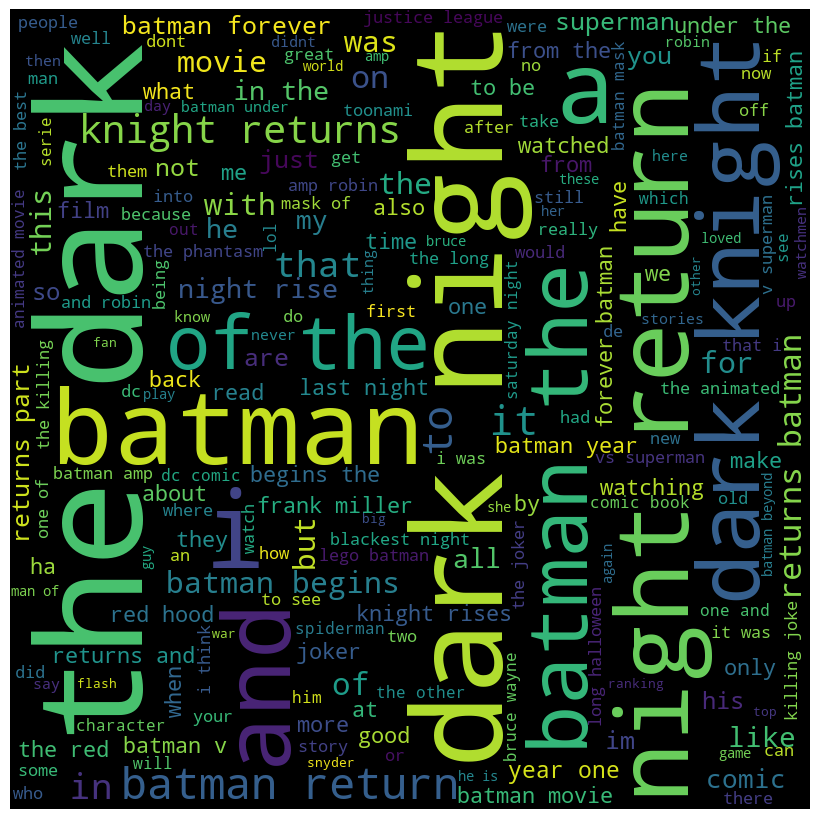

In [92]:
iow(batman_df, ['test'])

In [99]:
def get_n_grams(tokens):
    """
    Affiche les bigrammes et trigrammes les plus courants dans les données,
    triés par fréquence
    """

    bgs = nltk.bigrams(tokens)
    tgs = nltk.trigrams(tokens)

    n_grams = nltk.FreqDist(bgs).items() | nltk.FreqDist(tgs).items()
    n_grams_df = pd.DataFrame(n_grams, columns=["words sequences", "frequencies"])
    n_grams_df.sort_values(by=["frequencies"], ascending=False, inplace=True)
    print(n_grams_df.head(50))

In [102]:
stop_words = ["art","of","the","war"]
wl_df_war = list(war_df.renderedContent)
text_war = ''.join(map(str, wl_df_war))
tweets = text_war.lower().split()
tweets_words = [t for t in tweets if t not in stop_words]
get_n_grams(tweets_words)

                        words sequences  frequencies
15475                        (sun, tzu)          168
11374                        (that, he)          106
6654                     (so, that, he)          104
15868                        (so, that)          104
9990               (he, cannot, fathom)          103
19091                   (whole, secret)          103
16525                (that, he, cannot)          103
13239             (whole, secret, lies)          103
15005               (our, real, intent)          103
13254                    (secret, lies)          103
13269                    (real, intent)          103
1454                   (cannot, fathom)          103
3735             (confusing, enemy, so)          103
22054                (secret, lies, in)          103
8707                  (enemy, so, that)          103
8690                 (confusing, enemy)          103
17905                      (he, cannot)          103
15819                        (lies, in)       

In [105]:
stop_words = ["the","book","thief"]
wl_df_thief = list(thief_df.renderedContent)
text_thief = ''.join(map(str, wl_df_thief))
tweets = text_thief.lower().split()
tweets_words = [t for t in tweets if t not in stop_words]
get_n_grams(tweets_words)

                words sequences  frequencies
11389           (this, weekend)          172
13569           (weekend, plan)          172
12620                 (i, will)          115
1081                   (and, i)           99
1172                (to, watch)           89
9868              (my, weekend)           86
1055          (plan, to, watch)           86
11702              (weekend, i)           86
1097           (ltthe, thiefgt)           86
1159              (i, plan, to)           86
8253      (called, my, weekend)           86
5008        (my, weekend, plan)           86
13409              (plan, also)           86
15351           (because, this)           86
16864        (weekend, i, plan)           86
10625     (ltthe, thiefgt, and)           86
9919         (this, weekend, i)           86
13548              (called, my)           86
14297     (this, weekend, plan)           86
14216               (also, has)           86
6864                 (plan, to)           86
14605     

In [109]:
stop_words = ["the","picture","of","dorian","grey"]
wl_df_dorian = list(dorian_df.renderedContent)
text_dorian = ''.join(map(str, wl_df_dorian))
tweets = text_dorian.lower().split()
tweets_words = [t for t in tweets if t not in stop_words]
get_n_grams(tweets_words)

                 words sequences  frequencies
12381             (oscar, wilde)           51
3512                 (by, oscar)           29
17500                   (and, i)           18
11017         (by, oscar, wilde)           16
16071                  (it, was)           15
810                     (but, i)           15
383                      (is, a)           15
2327                   (to, see)           14
6027                    (i, was)           13
7706                  (she, was)           13
8846               (murder, she)           13
14255       (murder, she, wrote)           12
7743           (secret, history)           12
17216                   (was, a)           12
6901                    (to, be)           12
11004                  (i, love)           12
2197                  (to, read)           12
2374                (she, wrote)           12
8798           (everything, and)           11
957    (know, price, everything)           11
2903                   (her, in)  

In [110]:
stop_words = ["the","song","of","achilles"]
wl_df_achilles = list(achilles_df.renderedContent)
text_achilles = ''.join(map(str, wl_df_achilles))
tweets = text_achilles.lower().split()
tweets_words = [t for t in tweets if t not in stop_words]
get_n_grams(tweets_words)

                 words sequences  frequencies
15459         (madeline, miller)           83
6424              (by, madeline)           73
2845      (by, madeline, miller)           61
2385                  (to, read)           44
1446                    (and, i)           33
9631                   (i, read)           30
1209                    (but, i)           22
10718                 (want, to)           21
1055              (evelyn, hugo)           20
15762         (husbands, evelyn)           19
97                     (if, you)           18
15842               (this, year)           18
18233   (husbands, evelyn, hugo)           17
2964   (seven, husbands, evelyn)           16
10608                 (read, it)           16
6272                   (at, end)           16
7601           (seven, husbands)           16
18360                  (it, was)           16
4009                     (i, am)           15
7032                   (i, dont)           15
10631             (my, favorite)  

In [114]:
stop_words = ["batman","the","dark","knight","night","return"]
wl_df_batman = list(batman_df.renderedContent)
text_batman = ''.join(map(str, wl_df_batman))
tweets = text_batman.lower().split()
tweets_words = [t for t in tweets if t not in stop_words]
get_n_grams(tweets_words)

            words sequences  frequencies
34          (returns, part)           50
8038            (year, one)           42
620          (returns, and)           41
2942         (and, returns)           35
7108               (to, be)           28
19184           (red, hood)           27
5400          (of, returns)           26
20405             (part, 1)           25
18790          (under, red)           25
9890        (killing, joke)           24
17292    (under, red, hood)           24
1166                (is, a)           23
8334          (in, returns)           23
7275             (mask, of)           22
6334          (returns, is)           22
2107        (frank, miller)           22
17210  (mask, of, phantasm)           21
9130         (of, phantasm)           21
6584      (long, halloween)           21
9377      (justice, league)           20
10239          (amp, robin)           20
16490             (it, was)           19
7852              (to, see)           19
6752         (vs